# **I) Time Series Analysis Assignment: Predicting Stock Prices**

Setup and Data Acquisition
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

Instructions:
1. Model Building
Implement linear regression using the rolling averages as features. 
Create an Exponential Smoothing model that accounts for trend and seasonality.
2. Performance Metrics
Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
Provide commentary on the performance of each model based on these metrics.
3. Model Comparison and Interpretation
Compare the forecasted values against the actual values in the test set visually using a plot.
Interpret the results of each model and discuss any potential reasons for differences in performance.
Discuss the implications of model performance for real-world decision-making in finance.


## Install yfinance package

In [1]:
!pip install yfinance

## Import yfinance and download Apple Inc. stock data

In [2]:
#Importing all libraries needed
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt



In [3]:
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
'''
# After loading data
stock_data.index = pd.to_datetime(stock_data.index)  # Ensure index is in datetime format
stock_data = stock_data.asfreq('B')  # Set frequency to business days
'''

"\n# After loading data\nstock_data.index = pd.to_datetime(stock_data.index)  # Ensure index is in datetime format\nstock_data = stock_data.asfreq('B')  # Set frequency to business days\n"

In [5]:
# Ensure index is in datetime format and resample to business days
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.resample('B').mean()

In [6]:
stock_data.head(20)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-01-03,179.076599,182.009995,182.880005,177.710007,177.830002,104487900.0
2022-01-04,176.803818,179.699997,182.940002,179.119995,182.630005,99310400.0
2022-01-05,172.100876,174.919998,180.169998,174.639999,179.610001,94537600.0
2022-01-06,169.227936,172.000000,175.300003,171.639999,172.699997,96904000.0
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100.0
2022-01-10,169.414871,172.190002,172.500000,168.169998,169.080002,106765600.0
2022-01-11,172.258255,175.080002,175.179993,170.820007,172.320007,76138300.0
2022-01-12,172.701019,175.529999,177.179993,174.820007,176.119995,74805200.0


In [7]:
stock_data.tail(20)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-04,188.506485,189.429993,190.050003,187.449997,189.979996,43389500.0
2023-12-05,192.477051,193.419998,194.399994,190.179993,190.210007,66628400.0
2023-12-06,191.382401,192.320007,194.759995,192.110001,194.449997,41089700.0
2023-12-07,193.322906,194.270004,195.000000,193.589996,193.630005,47477700.0
2023-12-08,194.755890,195.710007,195.990005,193.669998,194.199997,53377300.0
2023-12-11,192.238220,193.179993,193.490005,191.419998,193.110001,60943700.0
2023-12-12,193.760788,194.710007,194.720001,191.720001,193.080002,52696900.0
2023-12-13,196.994934,197.960007,198.000000,194.850006,195.089996,70404200.0


In [8]:
# Remove rows with NaN values
stock_data.dropna(how='all', inplace=True)


### Columns Explanation:
- **Date**: The date of the trading day.
- **Open**: The opening price of the stock at the beginning of the trading day.
- **High**: The highest price the stock traded at during the trading day.
- **Low**: The lowest price the stock traded at during the trading day.
- **Close**: The unadjusted closing price of the stock at the end of the trading day.
- **Adj Close**: The adjusted closing price, accounting for corporate actions such as dividends and stock splits.
- **Volume**: The total number of shares traded during the trading day.

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  501 non-null    float64
 1   (Close, AAPL)      501 non-null    float64
 2   (High, AAPL)       501 non-null    float64
 3   (Low, AAPL)        501 non-null    float64
 4   (Open, AAPL)       501 non-null    float64
 5   (Volume, AAPL)     501 non-null    float64
dtypes: float64(6)
memory usage: 27.4 KB


First few rows of the data:
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076599  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803818  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100876  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227936  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   

Price            Volume  
Ticker             AAPL  
Date                     
2022-01-03  104487900.0  
2022-01-04   99310400.0  
2022-01-05   94537600.0  
2022-01-06   96904000.0  
2022-01-07   86709100.0  

Missing values:
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      

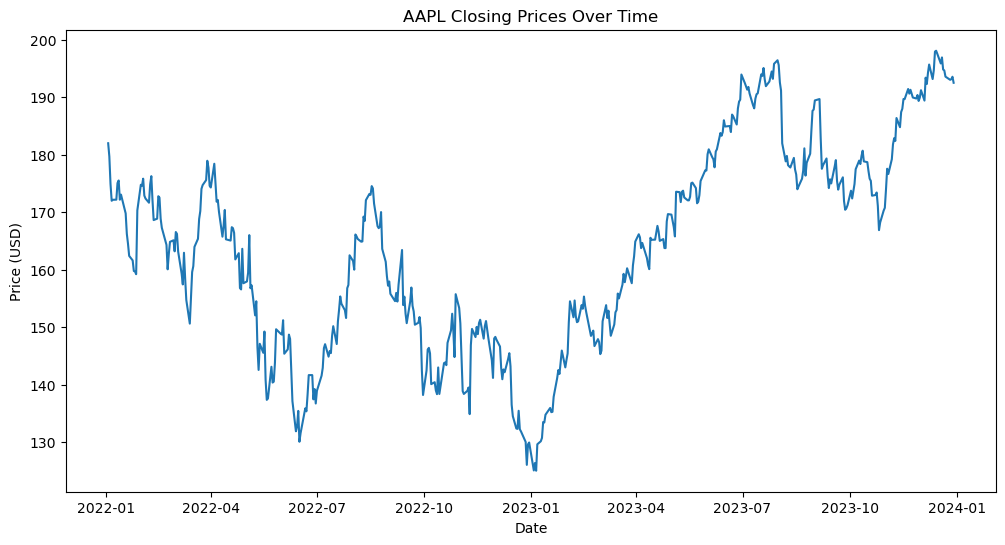

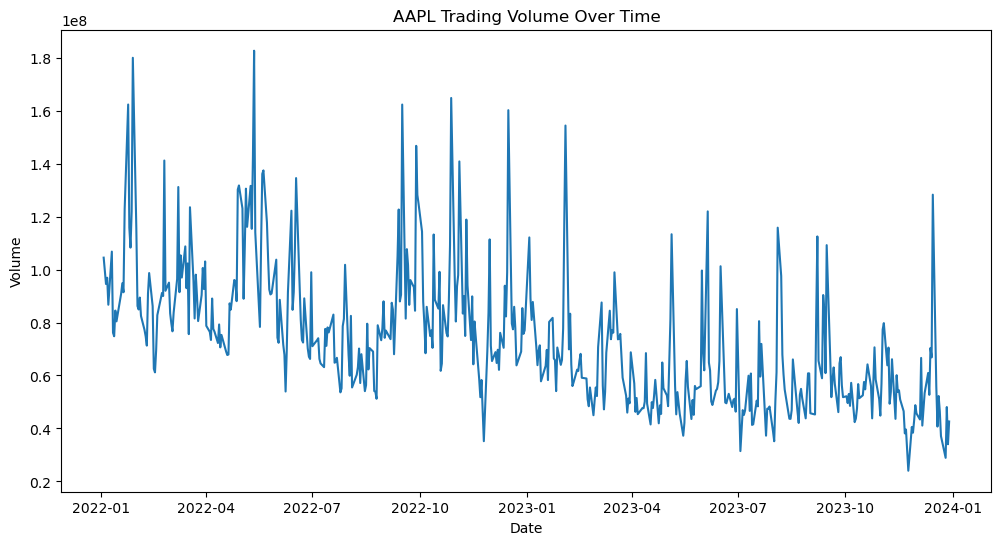


Basic Statistics:
Ticker        AAPL
count   501.000000
mean    163.674351
std      17.703835
min     125.019997
25%     149.350006
50%     165.020004
75%     176.279999
max     198.110001


<Figure size 1200x600 with 0 Axes>

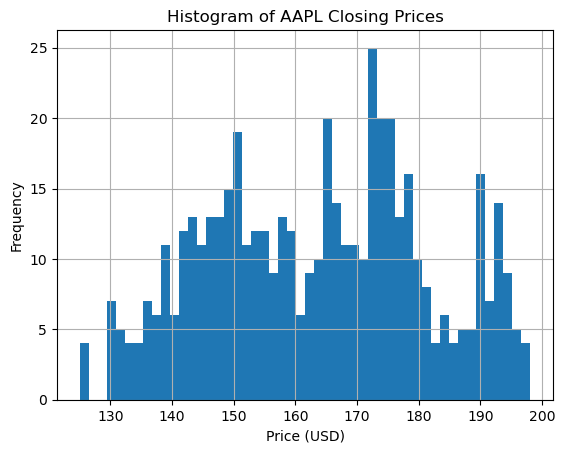


Ranked Table of Most Common Rounded Closing Prices:
   Price  Frequency  Rank
0  173.0         18   1.0
1  175.0         15   2.0
2  176.0         14   3.0
3  151.0         14   3.0
4  166.0         14   3.0
5  178.0         13   4.0
6  174.0         13   4.0
7  149.0         13   4.0
8  194.0         12   5.0
9  143.0         12   5.0


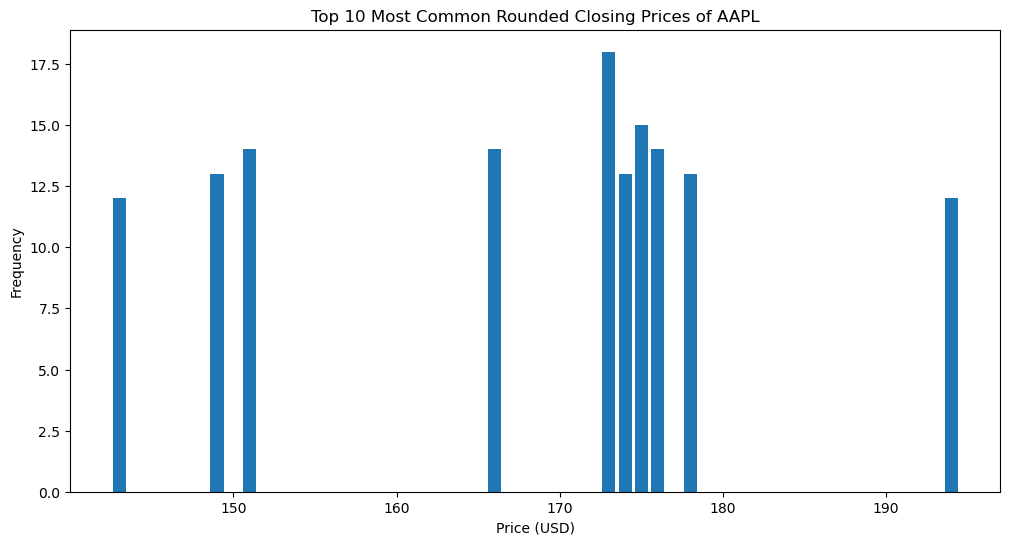


The mode of the rounded closing prices is: 173.0


In [10]:
# Comment explaining the EDA
"""
### Exploratory Data Analysis (EDA)
This section provides an overview of the historical stock price data for Apple Inc. (AAPL) from January 1, 2022, to January 1, 2024.

### Data Description
- The dataset includes daily stock prices with the following columns: Open, High, Low, Close, Adj Close, and Volume.
"""

# Display the first few rows of the data
print("First few rows of the data:")
print(stock_data.head())

# Check for missing values
print("\nMissing values:")
print(stock_data.isnull().sum())

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'])
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# Plot the volume over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Volume'])
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Calculate and display basic statistics
print("\nBasic Statistics:")
print(stock_data['Close'].describe())

# Plot a histogram of closing prices
plt.figure(figsize=(12, 6))
stock_data['Close'].hist(bins=50)
plt.title('Histogram of AAPL Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Round the closing prices to the nearest upper number
rounded_prices = np.ceil(stock_data['Close'])

# Calculate the frequency of rounded closing prices
price_frequency = rounded_prices.value_counts()

# Create a ranked table of the most common prices
ranked_prices = price_frequency.sort_values(ascending=False).reset_index()
ranked_prices.columns = ['Price', 'Frequency']
ranked_prices['Rank'] = ranked_prices['Frequency'].rank(method='dense', ascending=False)
print("\nRanked Table of Most Common Rounded Closing Prices:")
print(ranked_prices.head(10))  # Display the top 10 most common prices

# Visualize the ranked prices
plt.figure(figsize=(12, 6))
plt.bar(ranked_prices['Price'].head(10), ranked_prices['Frequency'].head(10))
plt.title('Top 10 Most Common Rounded Closing Prices of AAPL')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Identify the mode
mode_price = ranked_prices.loc[ranked_prices['Rank'] == 1, 'Price'].values[0]
print(f"\nThe mode of the rounded closing prices is: {mode_price}")

So for those 2 years the most frequent prices range between 173 and 178, which could tell us something that a good estimation could be on that range

Estimation and Forecasting

**Mode as a Benchmark:**

The mode (the most frequent price) can serve as a benchmark for estimations. If the mode is within the $173 to $178 range, it could be a reasonable estimate for future prices, especially in the short term, assuming that the underlying conditions remain stable.

**Range-Based Forecasting:** 

Given the frequency of prices within this range, a forecasting strategy could involve predicting prices to remain within this band. This approach is particularly useful for risk management and portfolio optimization, where predicting exact prices is less critical than understanding the likely range of prices.

# **1. Model Building**

## **1.1 Preprocessing with Feature Engineering**

Feature engineering is crucial for improving model performance. Here are three new features that can be derived from the existing dataset:


**Daily Spread (Volatility):**

Formula: Daily Spread = High - Low

Significance: This feature captures the daily price volatility of the stock. A larger spread indicates higher volatility, which can be an important factor in predicting future price movements.

**Price Change:**

Formula: Price Change = Close - Open

Significance: This feature indicates how much the price has changed during the trading day. It can provide insights into market sentiment—positive values indicate bullish sentiment, while negative values suggest bearish sentiment.

**Percentage Change:**

Formula: Percentage Change = (Close - Open) / Open * 100

Significance: This feature represents the percentage change in price from the opening to the closing price. It normalizes the price change relative to the opening price, making it easier to compare across different days.

In [11]:
# Feature Engineering: Create rolling averages and additional features
stock_data['Rolling_Avg_7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['Rolling_Avg_30'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()
stock_data['Daily Spread'] = stock_data['High'] - stock_data['Low']
stock_data['Price Change'] = stock_data['Close'] - stock_data['Open']
stock_data['Percentage Change'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100


In [12]:
stock_data.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Rolling_Avg_7,Rolling_Avg_30,Daily Spread,Price Change,Percentage Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2022-01-03,179.076599,182.009995,182.880005,177.710007,177.830002,104487900.0,182.009995,182.009995,5.169998,4.179993,2.350555
2022-01-04,176.803818,179.699997,182.940002,179.119995,182.630005,99310400.0,180.854996,180.854996,3.820007,-2.930008,-1.604341
2022-01-05,172.100876,174.919998,180.169998,174.639999,179.610001,94537600.0,178.876663,178.876663,5.529999,-4.690002,-2.611215
2022-01-06,169.227936,172.000000,175.300003,171.639999,172.699997,96904000.0,177.157497,177.157497,3.660004,-0.699997,-0.405325
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100.0,176.159998,176.159998,3.110001,-0.720001,-0.416450
2022-01-10,169.414871,172.190002,172.500000,168.169998,169.080002,106765600.0,175.498332,175.498332,4.330002,3.110001,1.839366
2022-01-11,172.258255,175.080002,175.179993,170.820007,172.320007,76138300.0,175.438570,175.438570,4.359985,2.759995,1.601668
2022-01-12,172.701019,175.529999,177.179993,174.820007,176.119995,74805200.0,174.512857,175.449999,2.359985,-0.589996,-0.334997


In [13]:
stock_data.tail(20)

Price,Adj Close,Close,High,Low,Open,Volume,Rolling_Avg_7,Rolling_Avg_30,Daily Spread,Price Change,Percentage Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2023-12-01,190.307678,191.240005,191.559998,189.229996,190.330002,45679300.0,190.289998,182.043333,2.330002,0.910004,0.478119
2023-12-04,188.506485,189.429993,190.050003,187.449997,189.979996,43389500.0,190.021426,182.595000,2.600006,-0.550003,-0.289506
2023-12-05,192.477051,193.419998,194.399994,190.179993,190.210007,66628400.0,190.514282,183.275666,4.220001,3.209991,1.687604
2023-12-06,191.382401,192.320007,194.759995,192.110001,194.449997,41089700.0,190.875713,183.905000,2.649994,-2.129990,-1.095392
2023-12-07,193.322906,194.270004,195.000000,193.589996,193.630005,47477700.0,191.428571,184.677333,1.410004,0.639999,0.330527
2023-12-08,194.755890,195.710007,195.990005,193.669998,194.199997,53377300.0,192.334287,185.638000,2.320007,1.510010,0.777554
2023-12-11,192.238220,193.179993,193.490005,191.419998,193.110001,60943700.0,192.795715,186.470000,2.070007,0.069992,0.036245
2023-12-12,193.760788,194.710007,194.720001,191.720001,193.080002,52696900.0,193.291430,187.284000,3.000000,1.630005,0.844212


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      501 non-null    float64
 1   (Close, AAPL)          501 non-null    float64
 2   (High, AAPL)           501 non-null    float64
 3   (Low, AAPL)            501 non-null    float64
 4   (Open, AAPL)           501 non-null    float64
 5   (Volume, AAPL)         501 non-null    float64
 6   (Rolling_Avg_7, )      501 non-null    float64
 7   (Rolling_Avg_30, )     501 non-null    float64
 8   (Daily Spread, )       501 non-null    float64
 9   (Price Change, )       501 non-null    float64
 10  (Percentage Change, )  501 non-null    float64
dtypes: float64(11)
memory usage: 47.0 KB


In [15]:
# Interpolate NaN values for rolling averages
stock_data['Rolling_Avg_7'] = stock_data['Rolling_Avg_7'].interpolate(method='linear')
stock_data['Rolling_Avg_30'] = stock_data['Rolling_Avg_30'].interpolate(method='linear')

In [16]:
stock_data.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Rolling_Avg_7,Rolling_Avg_30,Daily Spread,Price Change,Percentage Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2022-01-03,179.076599,182.009995,182.880005,177.710007,177.830002,104487900.0,182.009995,182.009995,5.169998,4.179993,2.350555
2022-01-04,176.803818,179.699997,182.940002,179.119995,182.630005,99310400.0,180.854996,180.854996,3.820007,-2.930008,-1.604341
2022-01-05,172.100876,174.919998,180.169998,174.639999,179.610001,94537600.0,178.876663,178.876663,5.529999,-4.690002,-2.611215
2022-01-06,169.227936,172.000000,175.300003,171.639999,172.699997,96904000.0,177.157497,177.157497,3.660004,-0.699997,-0.405325
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100.0,176.159998,176.159998,3.110001,-0.720001,-0.416450
2022-01-10,169.414871,172.190002,172.500000,168.169998,169.080002,106765600.0,175.498332,175.498332,4.330002,3.110001,1.839366
2022-01-11,172.258255,175.080002,175.179993,170.820007,172.320007,76138300.0,175.438570,175.438570,4.359985,2.759995,1.601668
2022-01-12,172.701019,175.529999,177.179993,174.820007,176.119995,74805200.0,174.512857,175.449999,2.359985,-0.589996,-0.334997


In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      501 non-null    float64
 1   (Close, AAPL)          501 non-null    float64
 2   (High, AAPL)           501 non-null    float64
 3   (Low, AAPL)            501 non-null    float64
 4   (Open, AAPL)           501 non-null    float64
 5   (Volume, AAPL)         501 non-null    float64
 6   (Rolling_Avg_7, )      501 non-null    float64
 7   (Rolling_Avg_30, )     501 non-null    float64
 8   (Daily Spread, )       501 non-null    float64
 9   (Price Change, )       501 non-null    float64
 10  (Percentage Change, )  501 non-null    float64
dtypes: float64(11)
memory usage: 47.0 KB


In [18]:
# Forward fill any remaining NaN values
stock_data['Rolling_Avg_7'] = stock_data['Rolling_Avg_7'].fillna(method='ffill')
stock_data['Rolling_Avg_30'] = stock_data['Rolling_Avg_30'].fillna(method='ffill')

C:\Users\darli\AppData\Local\Temp\ipykernel_18068\1524399397.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['Rolling_Avg_7'] = stock_data['Rolling_Avg_7'].fillna(method='ffill')
C:\Users\darli\AppData\Local\Temp\ipykernel_18068\1524399397.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['Rolling_Avg_30'] = stock_data['Rolling_Avg_30'].fillna(method='ffill')


In [19]:
stock_data.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Rolling_Avg_7,Rolling_Avg_30,Daily Spread,Price Change,Percentage Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2022-01-03,179.076599,182.009995,182.880005,177.710007,177.830002,104487900.0,182.009995,182.009995,5.169998,4.179993,2.350555
2022-01-04,176.803818,179.699997,182.940002,179.119995,182.630005,99310400.0,180.854996,180.854996,3.820007,-2.930008,-1.604341
2022-01-05,172.100876,174.919998,180.169998,174.639999,179.610001,94537600.0,178.876663,178.876663,5.529999,-4.690002,-2.611215
2022-01-06,169.227936,172.000000,175.300003,171.639999,172.699997,96904000.0,177.157497,177.157497,3.660004,-0.699997,-0.405325
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100.0,176.159998,176.159998,3.110001,-0.720001,-0.416450
2022-01-10,169.414871,172.190002,172.500000,168.169998,169.080002,106765600.0,175.498332,175.498332,4.330002,3.110001,1.839366
2022-01-11,172.258255,175.080002,175.179993,170.820007,172.320007,76138300.0,175.438570,175.438570,4.359985,2.759995,1.601668
2022-01-12,172.701019,175.529999,177.179993,174.820007,176.119995,74805200.0,174.512857,175.449999,2.359985,-0.589996,-0.334997


In [20]:
# Define features and target variable for Linear Regression
X = stock_data[['Rolling_Avg_7', 'Rolling_Avg_30', 'Daily Spread', 'Price Change', 'Percentage Change']]
y = stock_data['Close']

In [21]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      501 non-null    float64
 1   (Close, AAPL)          501 non-null    float64
 2   (High, AAPL)           501 non-null    float64
 3   (Low, AAPL)            501 non-null    float64
 4   (Open, AAPL)           501 non-null    float64
 5   (Volume, AAPL)         501 non-null    float64
 6   (Rolling_Avg_7, )      501 non-null    float64
 7   (Rolling_Avg_30, )     501 non-null    float64
 8   (Daily Spread, )       501 non-null    float64
 9   (Price Change, )       501 non-null    float64
 10  (Percentage Change, )  501 non-null    float64
dtypes: float64(11)
memory usage: 47.0 KB


In [22]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(stock_data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [23]:
# Create copies of the training and testing datasets for later use
X_train_copy = X_train.copy()  # Copy of the training features
y_train_copy = y_train.copy()    # Copy of the training labels
X_test_copy = X_test.copy()      # Copy of the testing features
y_test_copy = y_test.copy()      # Copy of the testing labels

In [24]:
# Standardize features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Fit a linear regression model on standardized features
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Predict the closing prices for the test set
y_pred_lr = lr_model.predict(X_test_scaled)

## **1.2 Create an Exponential Smoothing Model That Accounts for Trend and Seasonality**

In [27]:
# Define the parameter grid for grid search using Holt's method
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3, 0.4],
    'smoothing_trend': [0.1, 0.2, 0.3, 0.4]
}

# Initialize the best model and its RMSE
best_model = None
best_rmse = float('inf')

for smoothing_level in param_grid['smoothing_level']:
    for smoothing_trend in param_grid['smoothing_trend']:
        holt_model = Holt(stock_data['Close'], exponential=True)
        holt_model_fit = holt_model.fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)
        forecast_holt = holt_model_fit.forecast(len(y_test))
        rmse_holt = np.sqrt(mean_squared_error(y_test, forecast_holt))
        if rmse_holt < best_rmse:
            best_rmse = rmse_holt
            best_model = holt_model_fit

# Use the best model for forecasting
forecast_hw = best_model.forecast(len(y_test))


c:\Users\darli\anaconda3\envs\ELVTR_1st\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darli\anaconda3\envs\ELVTR_1st\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\darli\anaconda3\envs\ELVTR_1st\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\darli\anaconda3\envs\ELVTR_1st\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
 

# **2. Performance Metrics**

In [28]:
# Calculate performance metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Print performance metrics for Linear Regression
print(f"Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")



Linear Regression Metrics:
Mean Absolute Error (MAE): 2.21
Mean Squared Error (MSE): 7.97
Root Mean Squared Error (RMSE): 2.82


# **3. Model Comparison and Interpretation**


Exponential Smoothing Metrics:
Mean Absolute Error (MAE): 10.95
Mean Squared Error (MSE): 151.64
Root Mean Squared Error (RMSE): 12.31


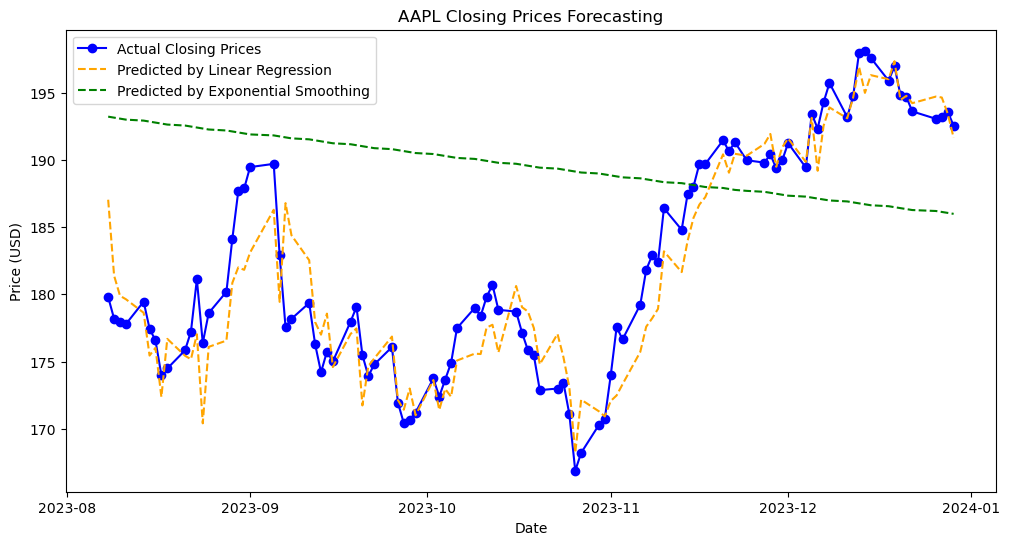

In [29]:
# Calculate performance metrics for Exponential Smoothing
mae_hw = mean_absolute_error(y_test, forecast_hw)
mse_hw = mean_squared_error(y_test, forecast_hw)
rmse_hw = np.sqrt(mse_hw)

# Print performance metrics for Exponential Smoothing
print(f"\nExponential Smoothing Metrics:")
print(f"Mean Absolute Error (MAE): {mae_hw:.2f}")
print(f"Mean Squared Error (MSE): {mse_hw:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_hw:.2f}")

# Plot the actual and predicted values for both models
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[train_size:], y_test, label='Actual Closing Prices', color='blue', marker='o')
plt.plot(stock_data.index[train_size:], y_pred_lr, label='Predicted by Linear Regression', linestyle='--', color='orange')
plt.plot(stock_data.index[train_size:], forecast_hw, label='Predicted by Exponential Smoothing', linestyle='--', color='green')
plt.title('AAPL Closing Prices Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [30]:
!pip install keras

In [31]:
!pip install tensorflow


# **II) Part Bonus Assingment: Predicting Apple Inc. Stock Prices with LTSM**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [33]:
# Assuming y_train_copy and y_test_copy are already preprocessed and split

# Function to create sequences for LSTM
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y_train = scaler.fit_transform(y_train_copy.values.reshape(-1, 1))
scaled_y_test = scaler.transform(y_test_copy.values.reshape(-1, 1))

# Create sequences for training and testing sets
seq_len = 30  # Length of the sequence
X_train_lstm, y_train_lstm = create_sequences(scaled_y_train, seq_len)
X_test_lstm, y_test_lstm = create_sequences(scaled_y_test, seq_len)

# Reshape X for LSTM input
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))


In [34]:
# Implement the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Fit the model
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32,
          validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])



Epoch 1/50


c:\Users\darli\anaconda3\envs\ELVTR_1st\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.1002 - val_loss: 0.0336
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - val_loss: 0.0053
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0128 - val_loss: 0.0079
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0105 - val_loss: 0.0064
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0098 - val_loss: 0.0080
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0082 - val_loss: 0.0101


In [35]:
# Make predictions on the test set
predictions = model.predict(X_test_lstm)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test_copy.values.reshape(-1, 1)[seq_len:])  # Adjust for sequence length

# Evaluate the model performance
mae_lstm = mean_absolute_error(y_test_inv.flatten(), predictions.flatten())
mse_lstm = mean_squared_error(y_test_inv.flatten(), predictions.flatten())
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
LSTM Model Metrics:
Mean Absolute Error (MAE): 13043.16
Mean Squared Error (MSE): 170549933.84
Root Mean Squared Error (RMSE): 13059.48


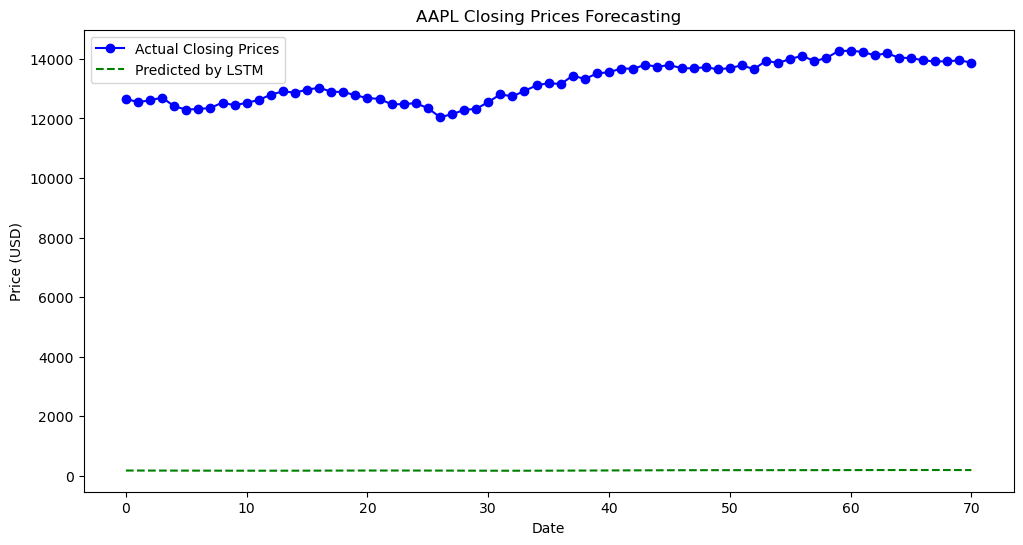

In [36]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv.flatten(), label='Actual Closing Prices', color='blue', marker='o')
plt.plot(predictions.flatten(), label='Predicted by LSTM', linestyle='--', color='green')
plt.title('AAPL Closing Prices Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [37]:
# Compare with other models
print("\nComparative Analysis:")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Exponential Smoothing RMSE: {rmse_hw:.2f}")
print(f"LSTM Model RMSE: {rmse_lstm:.2f}")



Comparative Analysis:
Linear Regression RMSE: 2.82
Exponential Smoothing RMSE: 12.31
LSTM Model RMSE: 13059.48
